# 1. Import the dataset

In [86]:
import pandas as pd

dataset = pd.read_csv('melb_data.csv')

In [87]:
dataset.shape

(13580, 21)

In [88]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [89]:
dataset.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

**Note on  varible**
1. *Suburb:* Name of suburb
2. *Rooms:* Number of rooms
3. *Price*: Price in dollars
4. *Method:* S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
5. *Type:* br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
6. *SellerG:* Real Estate Agent
7. *Date:* Date sold
8. *Distance:* Distance from Central Bussiness District
9. *Regionname:* General Region (West, North West, North, North east …etc)
10. *Propertycount:* Number of properties that exist in the suburb.
11. *Bedroom2:* Scraped # of Bedrooms (from different source)
12. *Bathroom:* Number of Bathrooms
13. *Car:* Number of carspots
14. *Landsize:* Land Size
15. *BuildingArea:* Building Size
16. *CouncilArea:* Governing council for the area
17. *Region name:* Name of region
18. *Lattitude:* Lattitde of that properties
19. *Longtitude:* Longtitude of that properties
20. *Yearbuilt:* The year that properties was built
21. *Address:* Address of that properties

# 2. Data preprocessing

In [90]:
dataset.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

This will format the `Date` attibute to datetime type instead of object. Orther attibutes are fine

Base on the graph above, Building area has 47.4% of null value, Yearbuilt has 39.5% of null value, Council area has 10% of null value, Car has 0.4% of null value and the other they don't have null value

Fill all null value of numerical column to 0 and null value of string column to 'None'

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to return missing ratios
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)
    [df.isnull().sum().sort_values(ascending = False) != 0]
    percent = (df.isnull().sum().sort_values(ascending = False) / len(df) * 100)
    [(df.isnull().sum().sort_values(ascending = False) / len(df) * 100) != 0]
    return pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_21948\445236083.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = missing.index, y = 'Percent', data = missing,


,BuildingArea,YearBuilt,CouncilArea,Car,Suburb,Bathroom,Regionname,Longtitude,Lattitude,Landsize,Bedroom2,Address,Postcode,Distance,Date,SellerG,Method,Price,Type,Rooms,Propertycount
Total,6450.000000,5375.000000,1369.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Percent,47.496318,39.580265,10.081001,0.456554,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


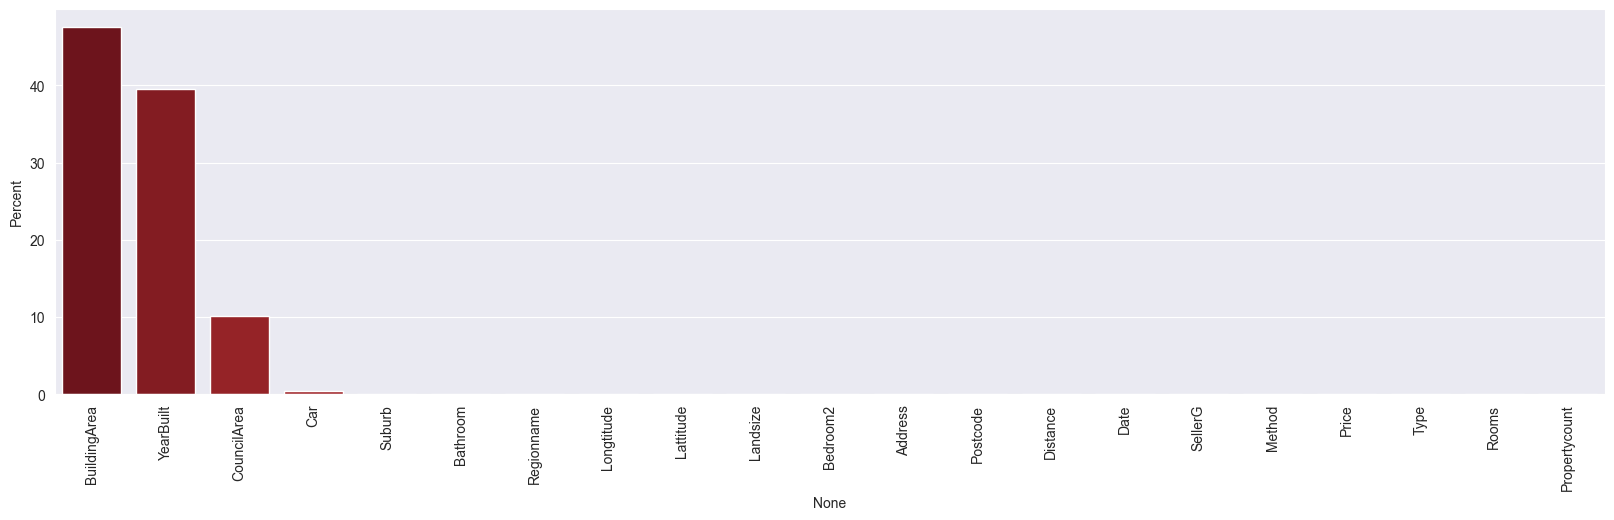

In [92]:
missing = missing_percentage(dataset)

fig, ax = plt.subplots(figsize = (20, 5))
sns.barplot(x = missing.index, y = 'Percent', data = missing,
            palette = 'Reds_r')
plt.xticks(rotation = 90)

display(missing.T.style.background_gradient(cmap = 'Reds', axis = 1))

In [93]:
dataset.nunique()

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64

I will drop the Address, Postcode column because it does not affect to the price.Also for the Date column because dates are nearly the same just 58 unique values so they don't describe anything through time

In [94]:
import numpy as np
#List of NaN which we will replace with mode
replace_with_mode = ['BuildingArea', 'YearBuilt', 'CouncilArea']
for col in replace_with_mode:
  dataset[col].replace(np.nan, dataset[col].mode()[0], inplace = True)

In [95]:
dataset['Car'].replace(np.nan, 0, inplace = True)

In [96]:
dataset.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [97]:
dataset.drop(['Address','Postcode', 'Date', 'Longtitude', 'Lattitude', 'SellerG'], axis = 1, inplace = True)

Now all the column is non-null. Next, we will convert datatype of columns which are more suitable for calculation

In [98]:
dataset['Car'] = dataset['Car'].astype(int)
dataset['YearBuilt'] = dataset['YearBuilt'].astype(int)
dataset['Propertycount'] = dataset['Propertycount'].astype(int)
dataset['Bedroom2'] = dataset['Bedroom2'].astype(int)
dataset['Bathroom'] = dataset['Bathroom'].astype(int)
dataset.dtypes

Suburb            object
Rooms              int64
Type              object
Price            float64
Method            object
Distance         float64
Bedroom2           int32
Bathroom           int32
Car                int32
Landsize         float64
BuildingArea     float64
YearBuilt          int32
CouncilArea       object
Regionname        object
Propertycount      int32
dtype: object

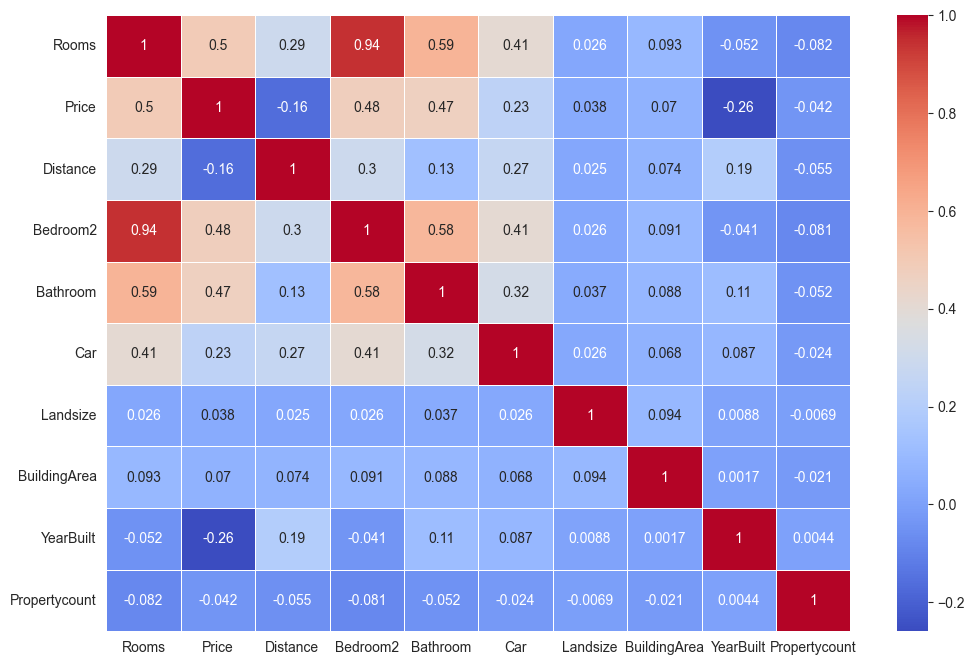

In [99]:
correlation_matrix = dataset.corr(numeric_only= True)
# Set the figure size for the plot
plt.figure(figsize=(12, 8))

sns.set_style('darkgrid')
sns.set_palette('Set2')

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.show()

***group bathroom xong mode***

We can easily see that Bathroom, Bedroom2, Rooms have very strong positive correlation with the house price. Come next are Car and Longtitude. Propertycount, Lattitude, Distance, YearBuilt have the negative correlation with house price

In [100]:
dataset.drop('Bedroom2', axis = 1, inplace = True)

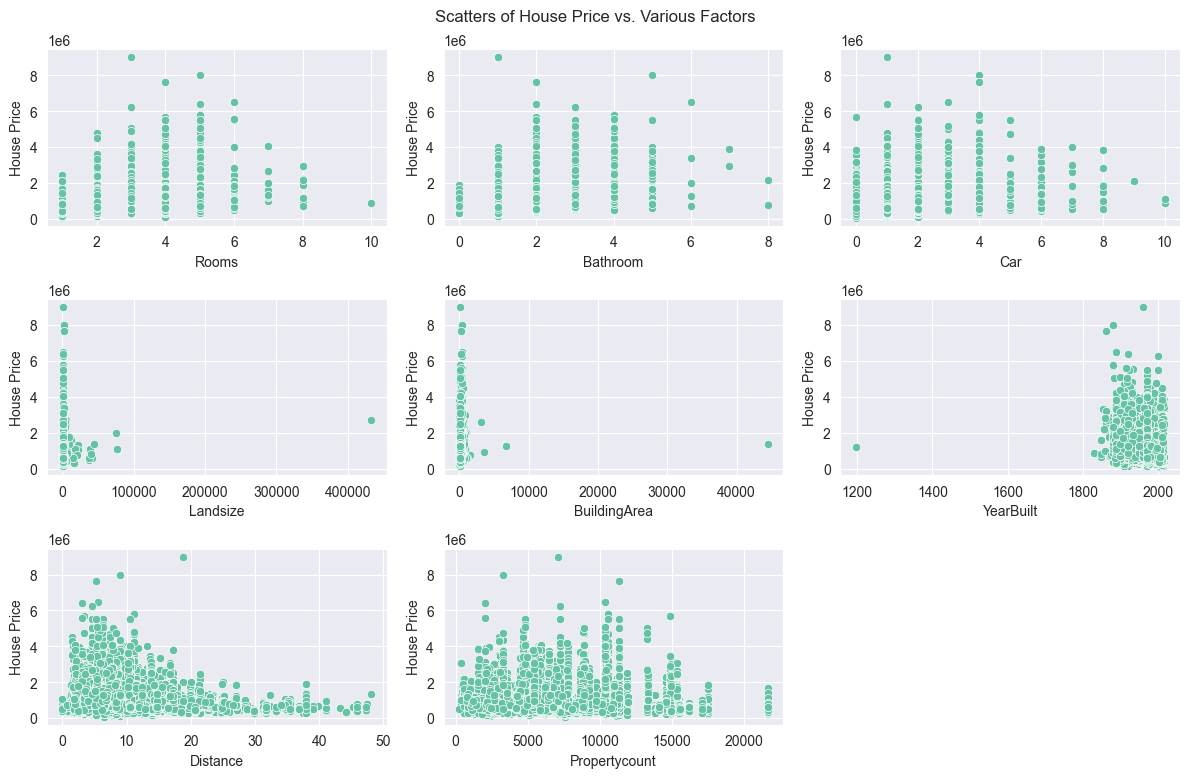

In [101]:
factors = ['Rooms', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Distance', 'Propertycount']

def scatter_factors_vs_house_price():
  plt.figure(figsize=(12, 10))
  # Iterate through the factors and create scatter for each
  for i, factor in enumerate(factors):
      plt.subplot(4, 3, i + 1)  # 3 rows, 3 columns, i+1 specifies the position
      sns.scatterplot(x=factor, y='Price', data=dataset)
      plt.xlabel(factor)
      plt.ylabel('House Price')

  # Add a title
  plt.suptitle('Scatters of House Price vs. Various Factors')

  # Adjust subplot layout
  plt.tight_layout()

  # Show the plots
  plt.show()

scatter_factors_vs_house_price()

There are some outliers in Landsize, BuildingArea and YearBuilt. Now we will clean them

In [102]:
dataset = dataset[dataset['BuildingArea'] < 40000]
dataset = dataset[dataset['Landsize'] < 400000]
dataset = dataset[dataset['YearBuilt'] > 1200]
dataset = dataset[dataset['Rooms'] < 10]

Detect outliers by eyes

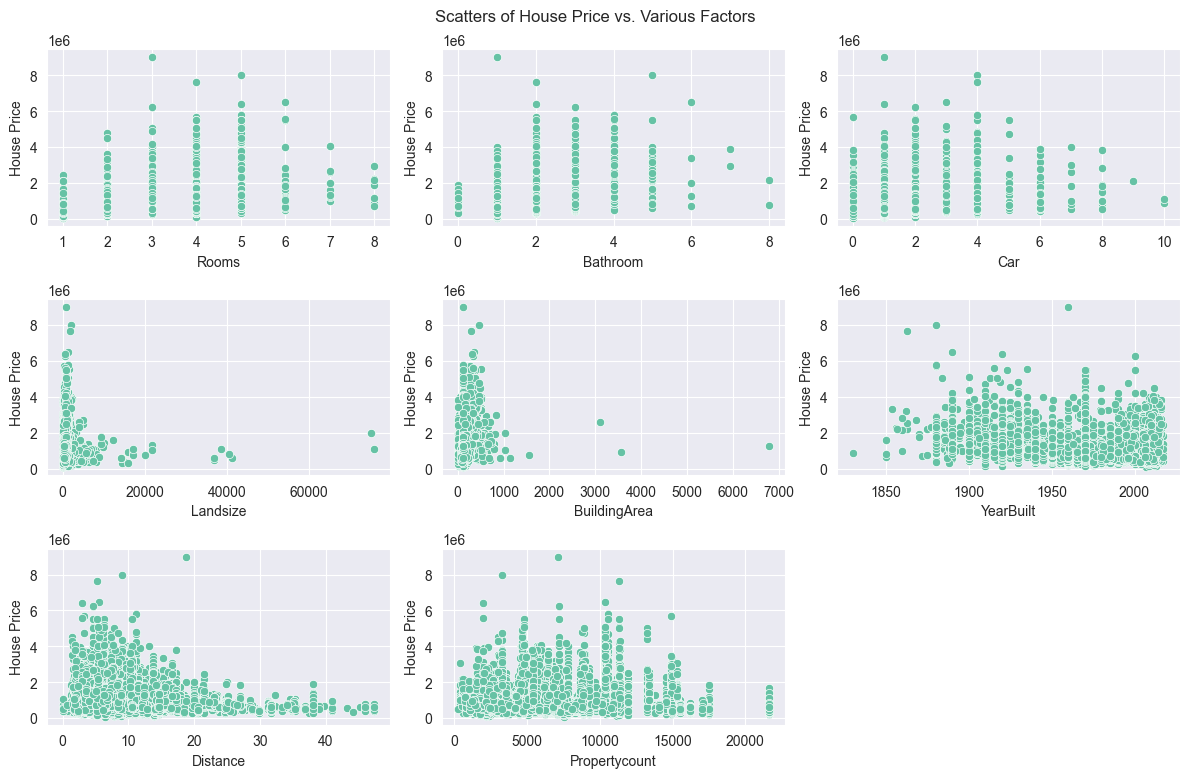

In [103]:
scatter_factors_vs_house_price()

We can see that:
- `House price` increases from 1 to 5 `rooms` but decrease from 6 to 10. It maybe from 1 to 5 `rooms` the house quality is high but from 6 to 10 the size of room is small and the quality of the house is low
- From 1 to 4 `bathrooms` the `house price` increases and from 5 to 8, it decreases
- It is obvious that the `house price` increases from 0 to 4 `carspots` and decreases between 6 to 10
- The `house price` does not depend on `Landsize`
- The `house price` dose not depend on `BuildingArea`
- The high `house price` is around -37.8 for `lattitude` and 145 for `longtitude`
- The `house price` form a nonlinear funtion base on the `year of that was built`, it increases between 1850 to 1910 and decrease from 1910 to 1970 and raises back steadily from 1910 to more than 2000
- The closer the house is to the business center, the more expensive it is
- Due to `Propertycount` strong fluctuation, the `house price` can be affected by `Propertycount`

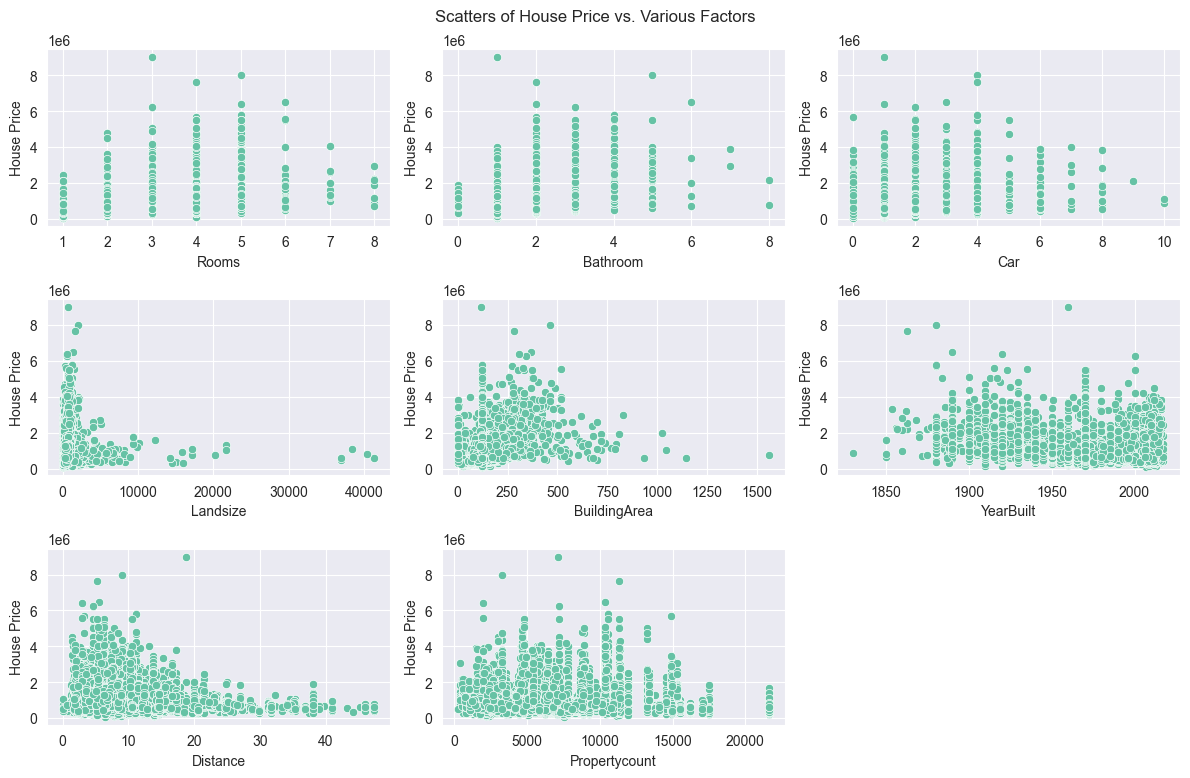

In [104]:
dataset = dataset[dataset['BuildingArea'] < 3000]
dataset = dataset[dataset['Landsize'] < 60000]
scatter_factors_vs_house_price()

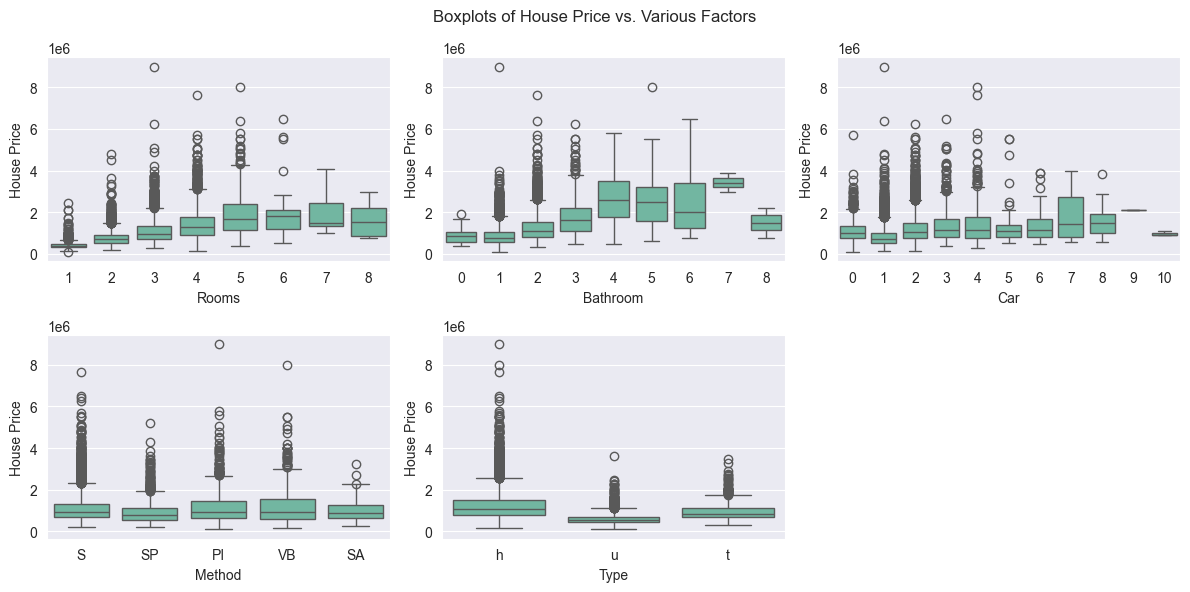

In [105]:
# Specify the factors you want to compare
factors_0 = ['Rooms', 'Bathroom', 'Car', 'Method', 'Type']

# Create a single figure with subplots
plt.figure(figsize=(12, 6))

# Iterate through the factors and create boxplots for each
for i, factor in enumerate(factors_0):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns, i+1 specifies the position
    sns.boxplot(x=factor, y='Price', data=dataset)
    plt.xlabel(factor)
    plt.ylabel('House Price')

# Add a title
plt.suptitle('Boxplots of House Price vs. Various Factors')

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

- As we expected but there is a bit difference, the median increases from 1 to 6 rooms and decreases from 7 to 10 `rooms`
- The median of `Bathrooms` increases between 0 to 4 and decreases from 5 to 8, except the case having 7 bathrooms has the highest median of all
- Despite increasing in number of `carspots` the median of `house price` does not increase
- The `price` does not change much base on `method`
- `h type house` price is higher than `t type` and `t type` is higher than `u type`

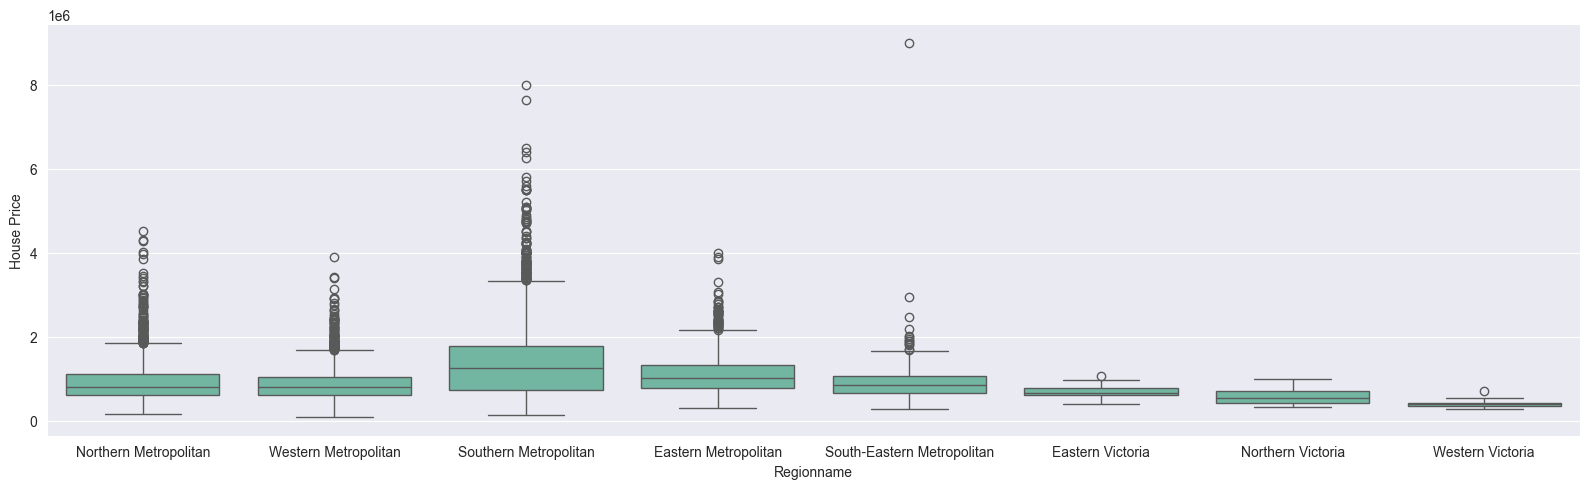

In [106]:
plt.figure(figsize=(16, 5))
sns.boxplot(x='Regionname', y='Price', data=dataset)
plt.xlabel('Regionname')
plt.ylabel('House Price')

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

The price house in Southern Metropolitan is the highest, the second is Eastern Metropolitan. Come next are Northen Metropolian and Western Metropilitan and finally are Eastern Victoria, Northern Victoria and Western Victoria

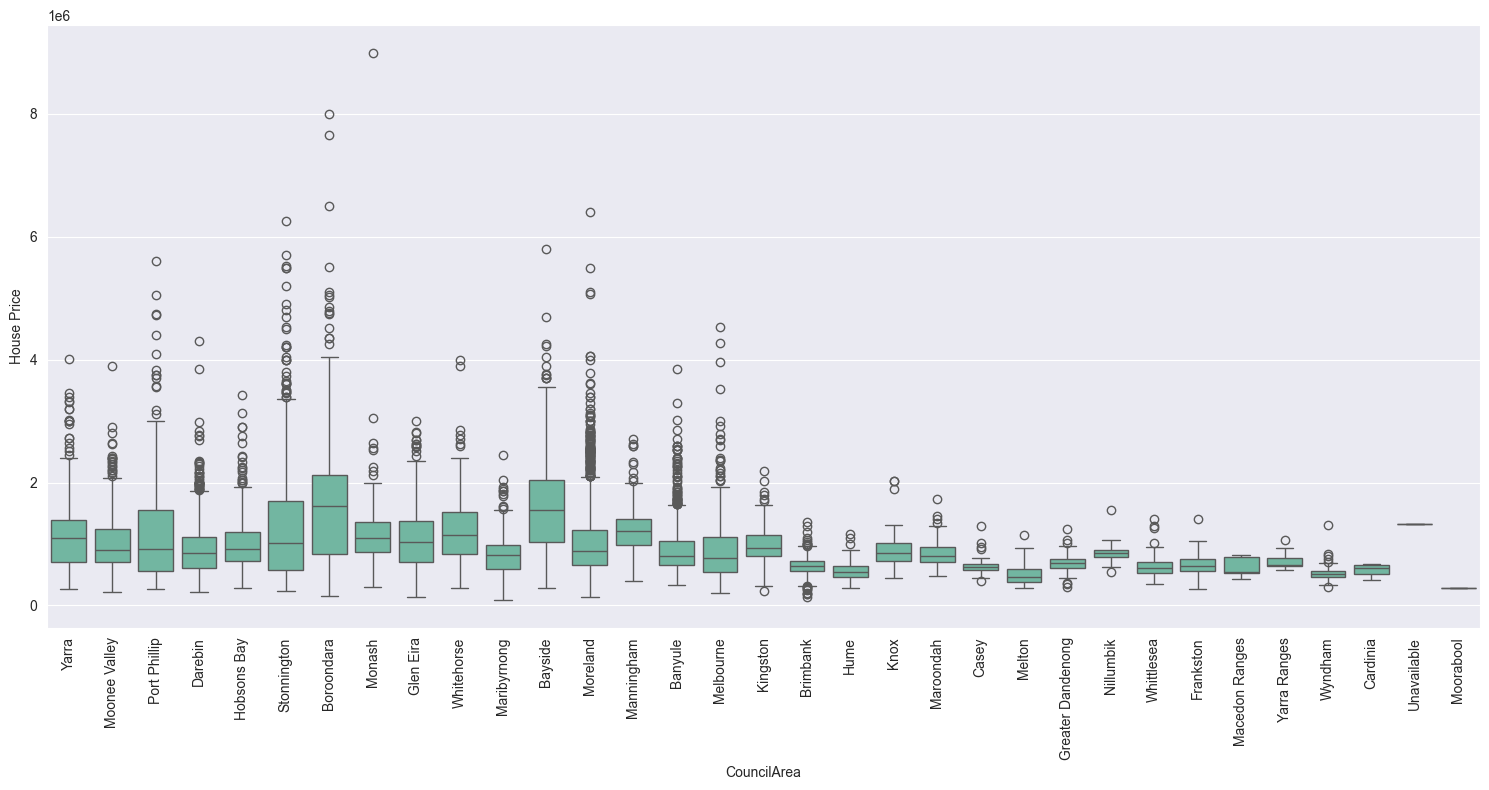

In [107]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='CouncilArea', y='Price', data=dataset)
plt.xlabel('CouncilArea')
plt.ylabel('House Price')

plt.xticks(rotation = 90)
# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

`House price` of each `Council area` is very different. Boroondara is the highest and the lowest is Moorabool. It can be said that house in some council area are much expensive.

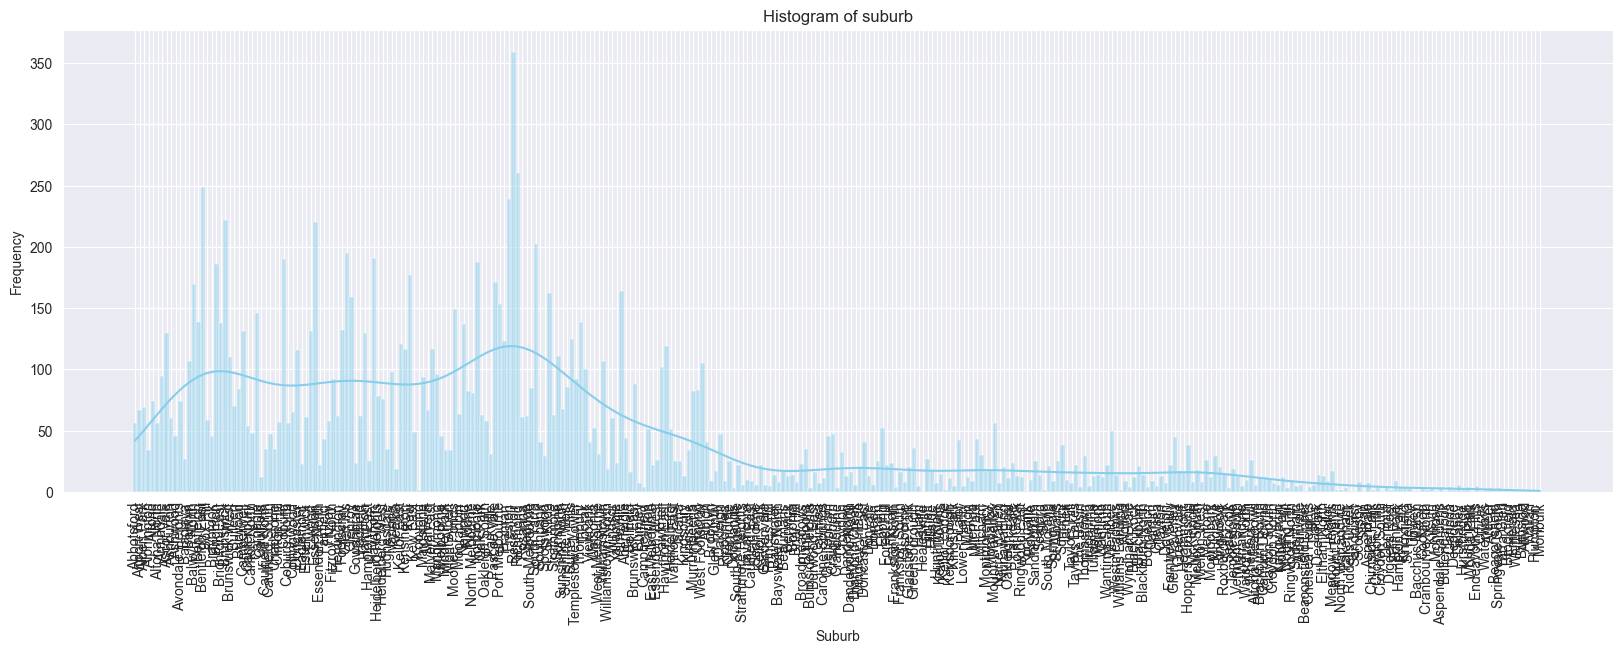

In [108]:
# Select the column you want to create a histogram for
suburb_column = dataset['Suburb']

# Create a histogram using Seaborn
plt.figure(figsize=(20, 6))
sns.histplot(suburb_column, bins=20, kde=True, color='skyblue')
plt.xlabel('Suburb')
plt.ylabel('Frequency')
plt.title('Histogram of suburb')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

Because suburb has too many value and suburb already included in council so it will be dropped 

In [109]:
dataset.drop('Suburb', axis = 1, inplace = True)

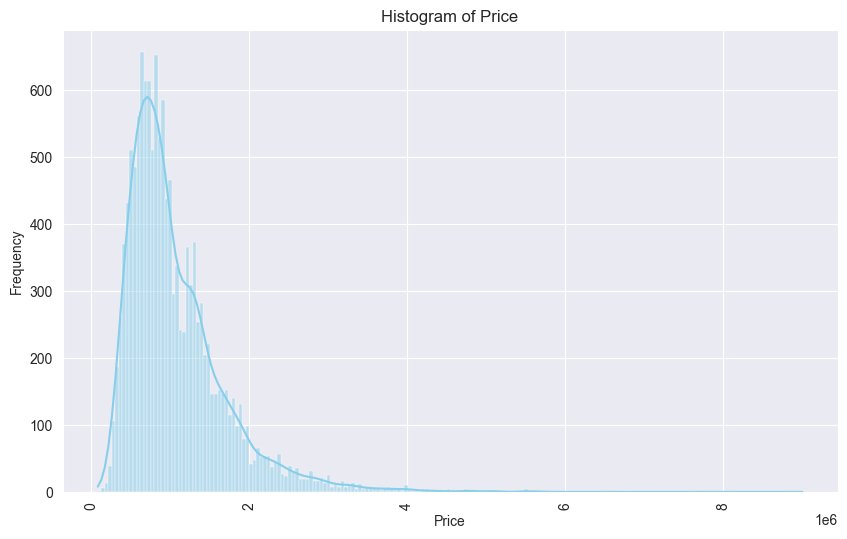

In [110]:
# Select the column you want to create a histogram for
price_column = dataset['Price']

# Create a histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(price_column, bins=200, kde=True, color='skyblue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [111]:
dataset['Price'].describe()

count    1.357100e+04
mean     1.075362e+06
std      6.391752e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.020000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

From 650 000 to 1 300 000 is the medium price. Higher than 1 300 000 is the high price and below 650 000 is the low price. It is not normal due to skewness, we can use power transform

We will draw other historgram to see how the data is distributed

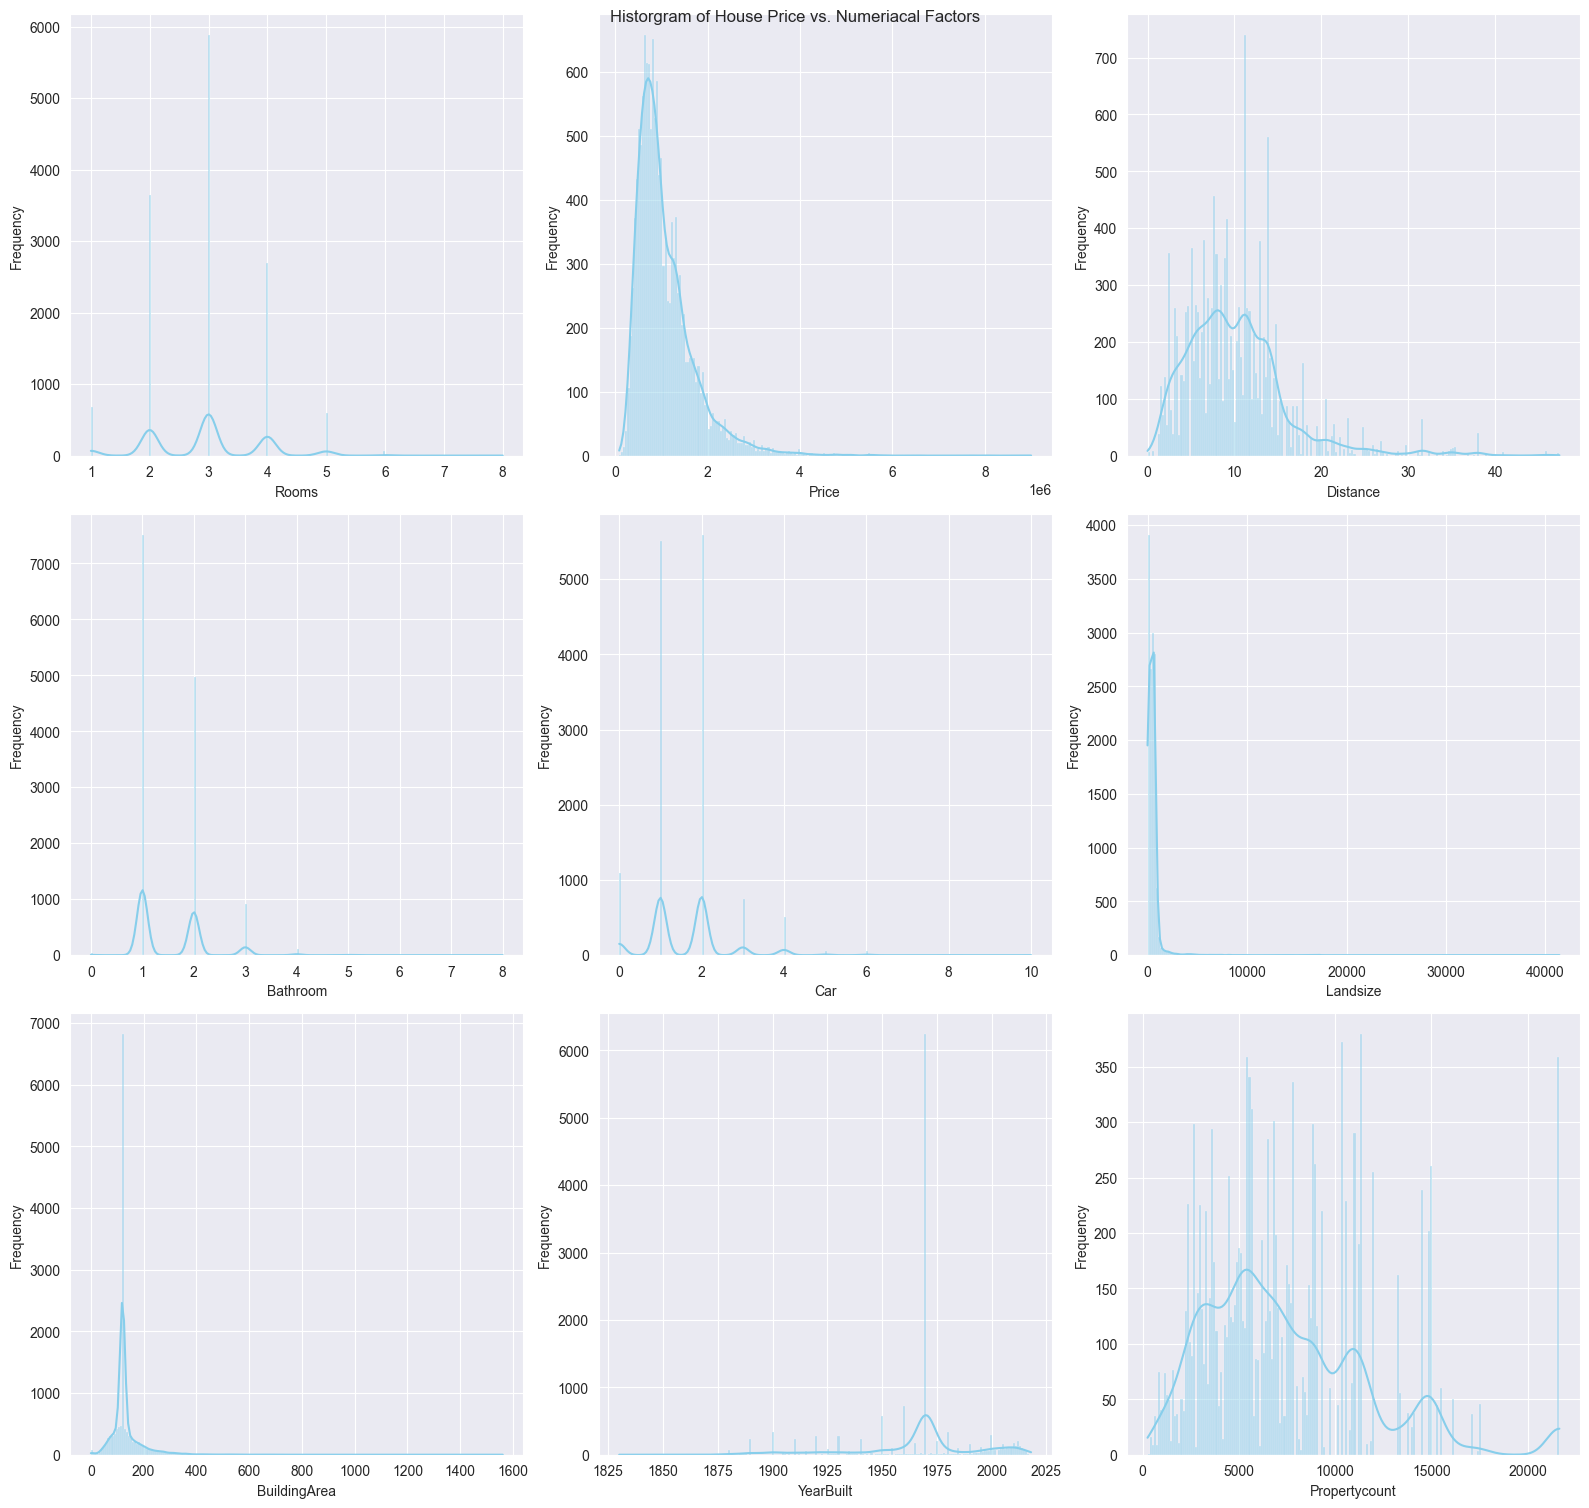

In [112]:
# Create a single figure with subplots
plt.figure(figsize=(16, 20))

# Iterate through the factors and create boxplots for each
for i, factor in enumerate(dataset.select_dtypes(exclude=['object']).columns):
    plt.subplot(4, 3, i + 1)  # 2 rows, 3 columns, i+1 specifies the position
    sns.histplot(dataset[factor], bins=200, kde=True, color='skyblue')
    plt.xlabel(factor)
    plt.ylabel('Frequency')

# Add a title
plt.suptitle('Historgram of House Price vs. Numeriacal Factors')

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

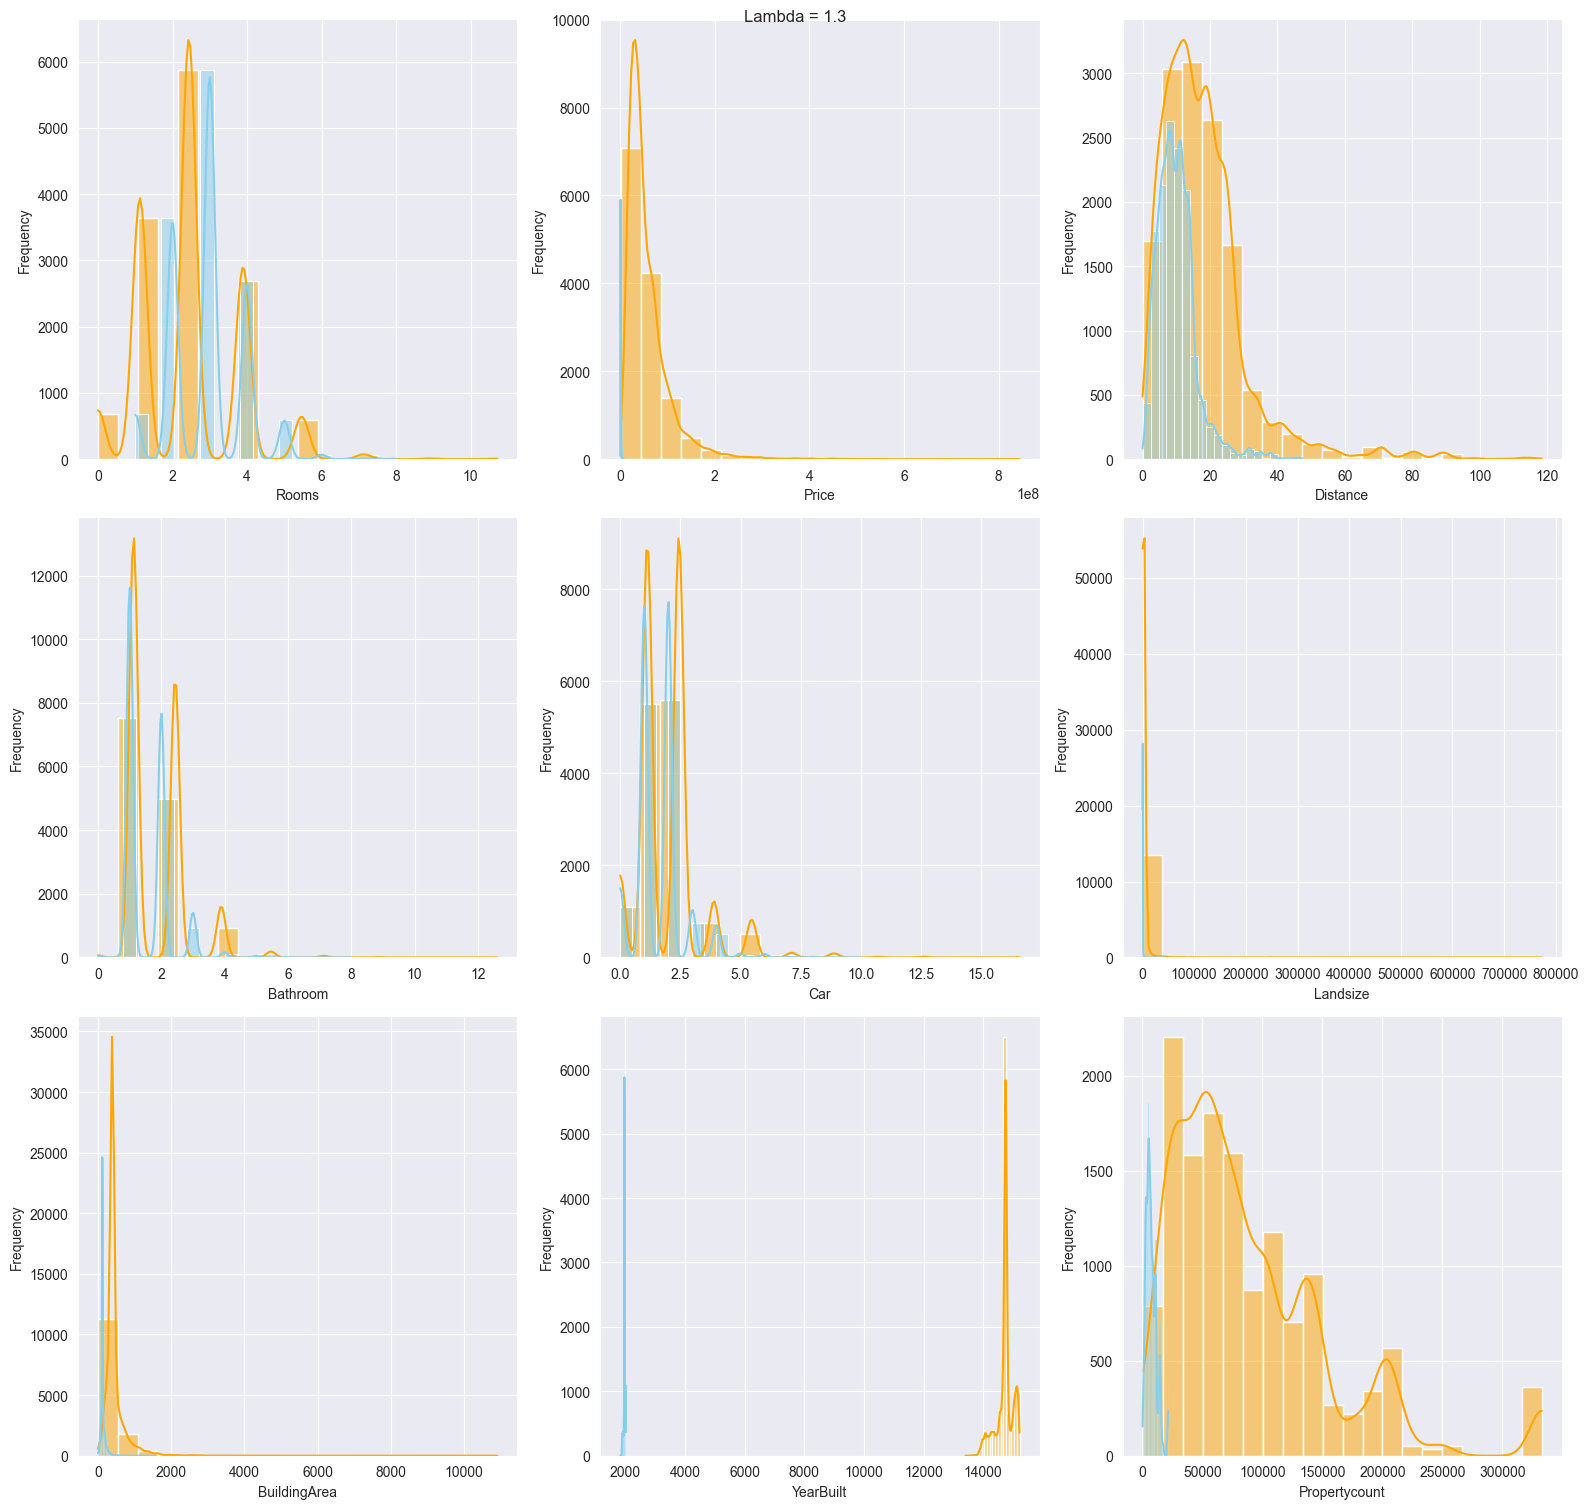

In [113]:
from scipy.stats import boxcox, yeojohnson, boxcox_normmax
import seaborn as sns
import matplotlib.pyplot as plt

L = 1.3  # Initial value of L

plt.figure(figsize=(16, 20))

for i, factor in enumerate(dataset.select_dtypes(exclude=['object']).columns):
    plt.subplot(4, 3, i + 1)  # 4 rows, 3 columns, i+1 specifies the position
    if all(dataset[factor] > 0):
        transformed_data = boxcox(dataset[factor], lmbda=L)
        sns.histplot(transformed_data, bins=20, kde=True, color='orange', label='Transformed')
        sns.histplot(dataset[factor], bins=20, kde=True, color='skyblue', label='Original')

    else:
        transformed_data = yeojohnson(dataset[factor], lmbda=L)
        sns.histplot(transformed_data, bins=20, kde=True, color='orange', label='Transformed')
        sns.histplot(dataset[factor], bins=20, kde=True, color='skyblue', label='Original')

    plt.xlabel(factor)
    plt.ylabel('Frequency')

plt.suptitle(f'Lambda = {L}')
plt.tight_layout()
plt.show()

We can see that if λ = 1.05 ( log transformation ) for all factors. The data's shapes nomralized for better view. But we can see that the distribution of pre-scaled or post-scaled do not affect the models that we prepared.

# 3. Building models

**Classic Method**
1. Normal linear regression
2. Ridge regression
3. LASSO regression

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# Let's consider 'Rooms', 'Bathroom', 'Landsize', and 'BuildingArea' as features (X)
# and 'Price' as the target variable (y)
# Select features and target variable
X = dataset.drop("Price", axis=1)  # Features
y = dataset["Price"]  # Target variable
X.columns = X.columns.astype(str)

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

# Apply transformers to numerical and categorical data
X_numerical = numerical_transformer.fit_transform(X[numerical_cols])
X_categorical = categorical_transformer.fit_transform(X[categorical_cols]).toarray()
categorical_feature_names = list(categorical_transformer.get_feature_names_out(categorical_cols))
X_transformed = pd.concat([pd.DataFrame(X_numerical, columns=numerical_cols), pd.DataFrame(X_categorical, columns=categorical_feature_names)], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state = 42)

# Create and train Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Create and train Linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Create and train Lasso regression model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Make predictions on the test set for all models
ridge_predictions = ridge_model.predict(X_test)
linear_predictions = linear_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)

# Evaluate the Ridge model
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)
print(f'Ridge Root Mean Squared Error: {ridge_rmse}')

# Evaluate the Linear model
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_rmse = np.sqrt(linear_mse)
print(f'Linear Root Mean Squared Error: {linear_rmse}')

# Evaluate the Lasso model
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)
print(f'Lasso Root Mean Squared Error: {lasso_rmse}')

Ridge Root Mean Squared Error: 416472.0934684319
Linear Root Mean Squared Error: 416447.8550111197
Lasso Root Mean Squared Error: 416447.81802432344


In [116]:
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import SGD
from tensorflow.keras import layers

# Build a deep neural network model
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model
model.compile(optimizer= 'adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')




Epoch 1/30

340/340 [==============================] - 3s 3ms/step - loss: 1298299748352.0000 - val_loss: 526667153408.0000
Epoch 2/30
340/340 [==============================] - 1s 2ms/step - loss: 278989504512.0000 - val_loss: 236961447936.0000
Epoch 3/30
340/340 [==============================] - 1s 2ms/step - loss: 210248122368.0000 - val_loss: 211096485888.0000
Epoch 4/30
340/340 [==============================] - 1s 2ms/step - loss: 190638866432.0000 - val_loss: 194579283968.0000
Epoch 5/30
340/340 [==============================] - 1s 2ms/step - loss: 179148062720.0000 - val_loss: 185698959360.0000
Epoch 6/30
340/340 [==============================] - 1s 2ms/step - loss: 171627659264.0000 - val_loss: 179563003904.0000
Epoch 7/30
340/340 [==============================] - 1s 2ms/step - loss: 166624313344.0000 - val_loss: 176572219392.0000
Epoch 8/30
340/340 [==============================] - 1s 2ms/step - loss: 162364588032.0000 - val_loss: 171367694336.0000
Epoch 9/30
340/340 

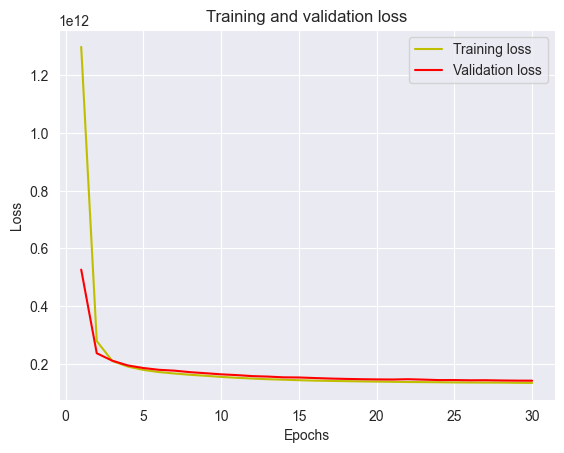

In [117]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# plt.plot(epochs, acc, 'y', label='Training acc')
# plt.plot(epochs, val_acc, 'r', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()